# Economic Data Analysis with Fred

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

fred_key = '61216b0ddc3e0b7ed21d4172dd7e94be'


Create the Fred Object

In [2]:
fred = Fred(api_key= fred_key)

Search for economic data

In [3]:
sp_search = fred.search('S&P', order_by= 'popularity')

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-08-30,2025-08-30,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-08-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-29 09:04:09-05:00,97,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-08-30,2025-08-30,S&P 500,2015-08-31,2025-08-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-08-29 19:02:11-05:00,89,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-08-30,2025-08-30,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-08-26 08:12:01-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-08-30,2025-08-30,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-08-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-29 09:04:13-05:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-08-30,2025-08-30,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-08-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-29 10:24:02-05:00,83,The ICE BofA Option-Adjusted Spreads (OASs) ar...


Pull Raw Data and Plot

<Axes: title={'center': 'S&P 500'}>

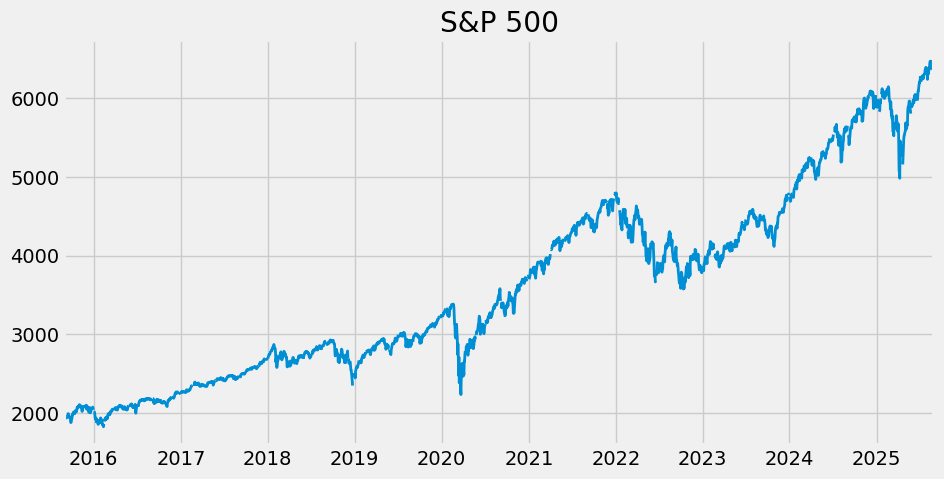

In [5]:
sp500 = fred.get_series(series_id ='SP500')
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 2)

Pull and Join Multiple Data Series

In [6]:
unemp_df = fred.search('unemployment rate state' ,filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [7]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2025-08-30,2025-08-30,Unemployment Rate in California,1976-01-01,2025-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-08-20 10:15:27-05:00,65,None
TXUR,TXUR,2025-08-30,2025-08-30,Unemployment Rate in Texas,1976-01-01,2025-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-08-20 10:15:12-05:00,54,None
NYUR,NYUR,2025-08-30,2025-08-30,Unemployment Rate in New York,1976-01-01,2025-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-08-20 10:16:02-05:00,54,None
FLUR,FLUR,2025-08-30,2025-08-30,Unemployment Rate in Florida,1976-01-01,2025-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-08-20 10:15:41-05:00,51,None
MIUR,MIUR,2025-08-30,2025-08-30,Unemployment Rate in Michigan,1976-01-01,2025-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-08-20 10:15:52-05:00,42,None


In [8]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

uemp_results = pd.concat(all_results, axis = 1).drop(columns= 'LASMT261982000000003')

In [9]:
uemp_states = uemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').str.strip().to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
uemp_states = uemp_states.rename(columns = {'the District of Columbia': 'District Of Columbia'})

In [10]:
# Plotting each states unemployment rate
px.line(uemp_states)

Pull May 2020 Unemployment Rate Per State

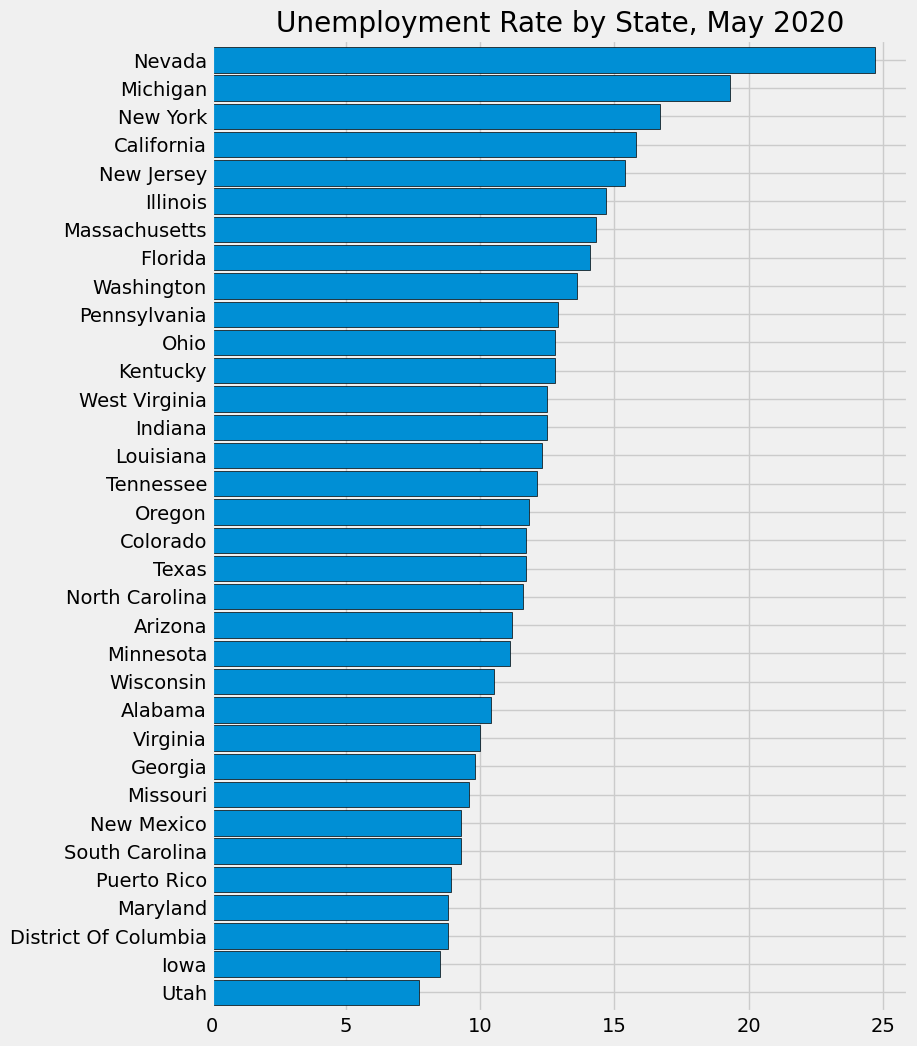

In [11]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T.\
    sort_values('2020-05-01')\
    .plot(kind = 'barh', figsize = (8,12), width = 0.9, edgecolor = 'black',
           title = 'Unemployment Rate by State, May 2020')

ax.legend().remove()
plt.show()

Pull Participation Rate

In [12]:
part_df = fred.search('participation rate state' ,filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df[part_df['title'].str.contains('Labor Force Participation Rate for')]


In [13]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').str.strip().to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

Unemployment vs Participation

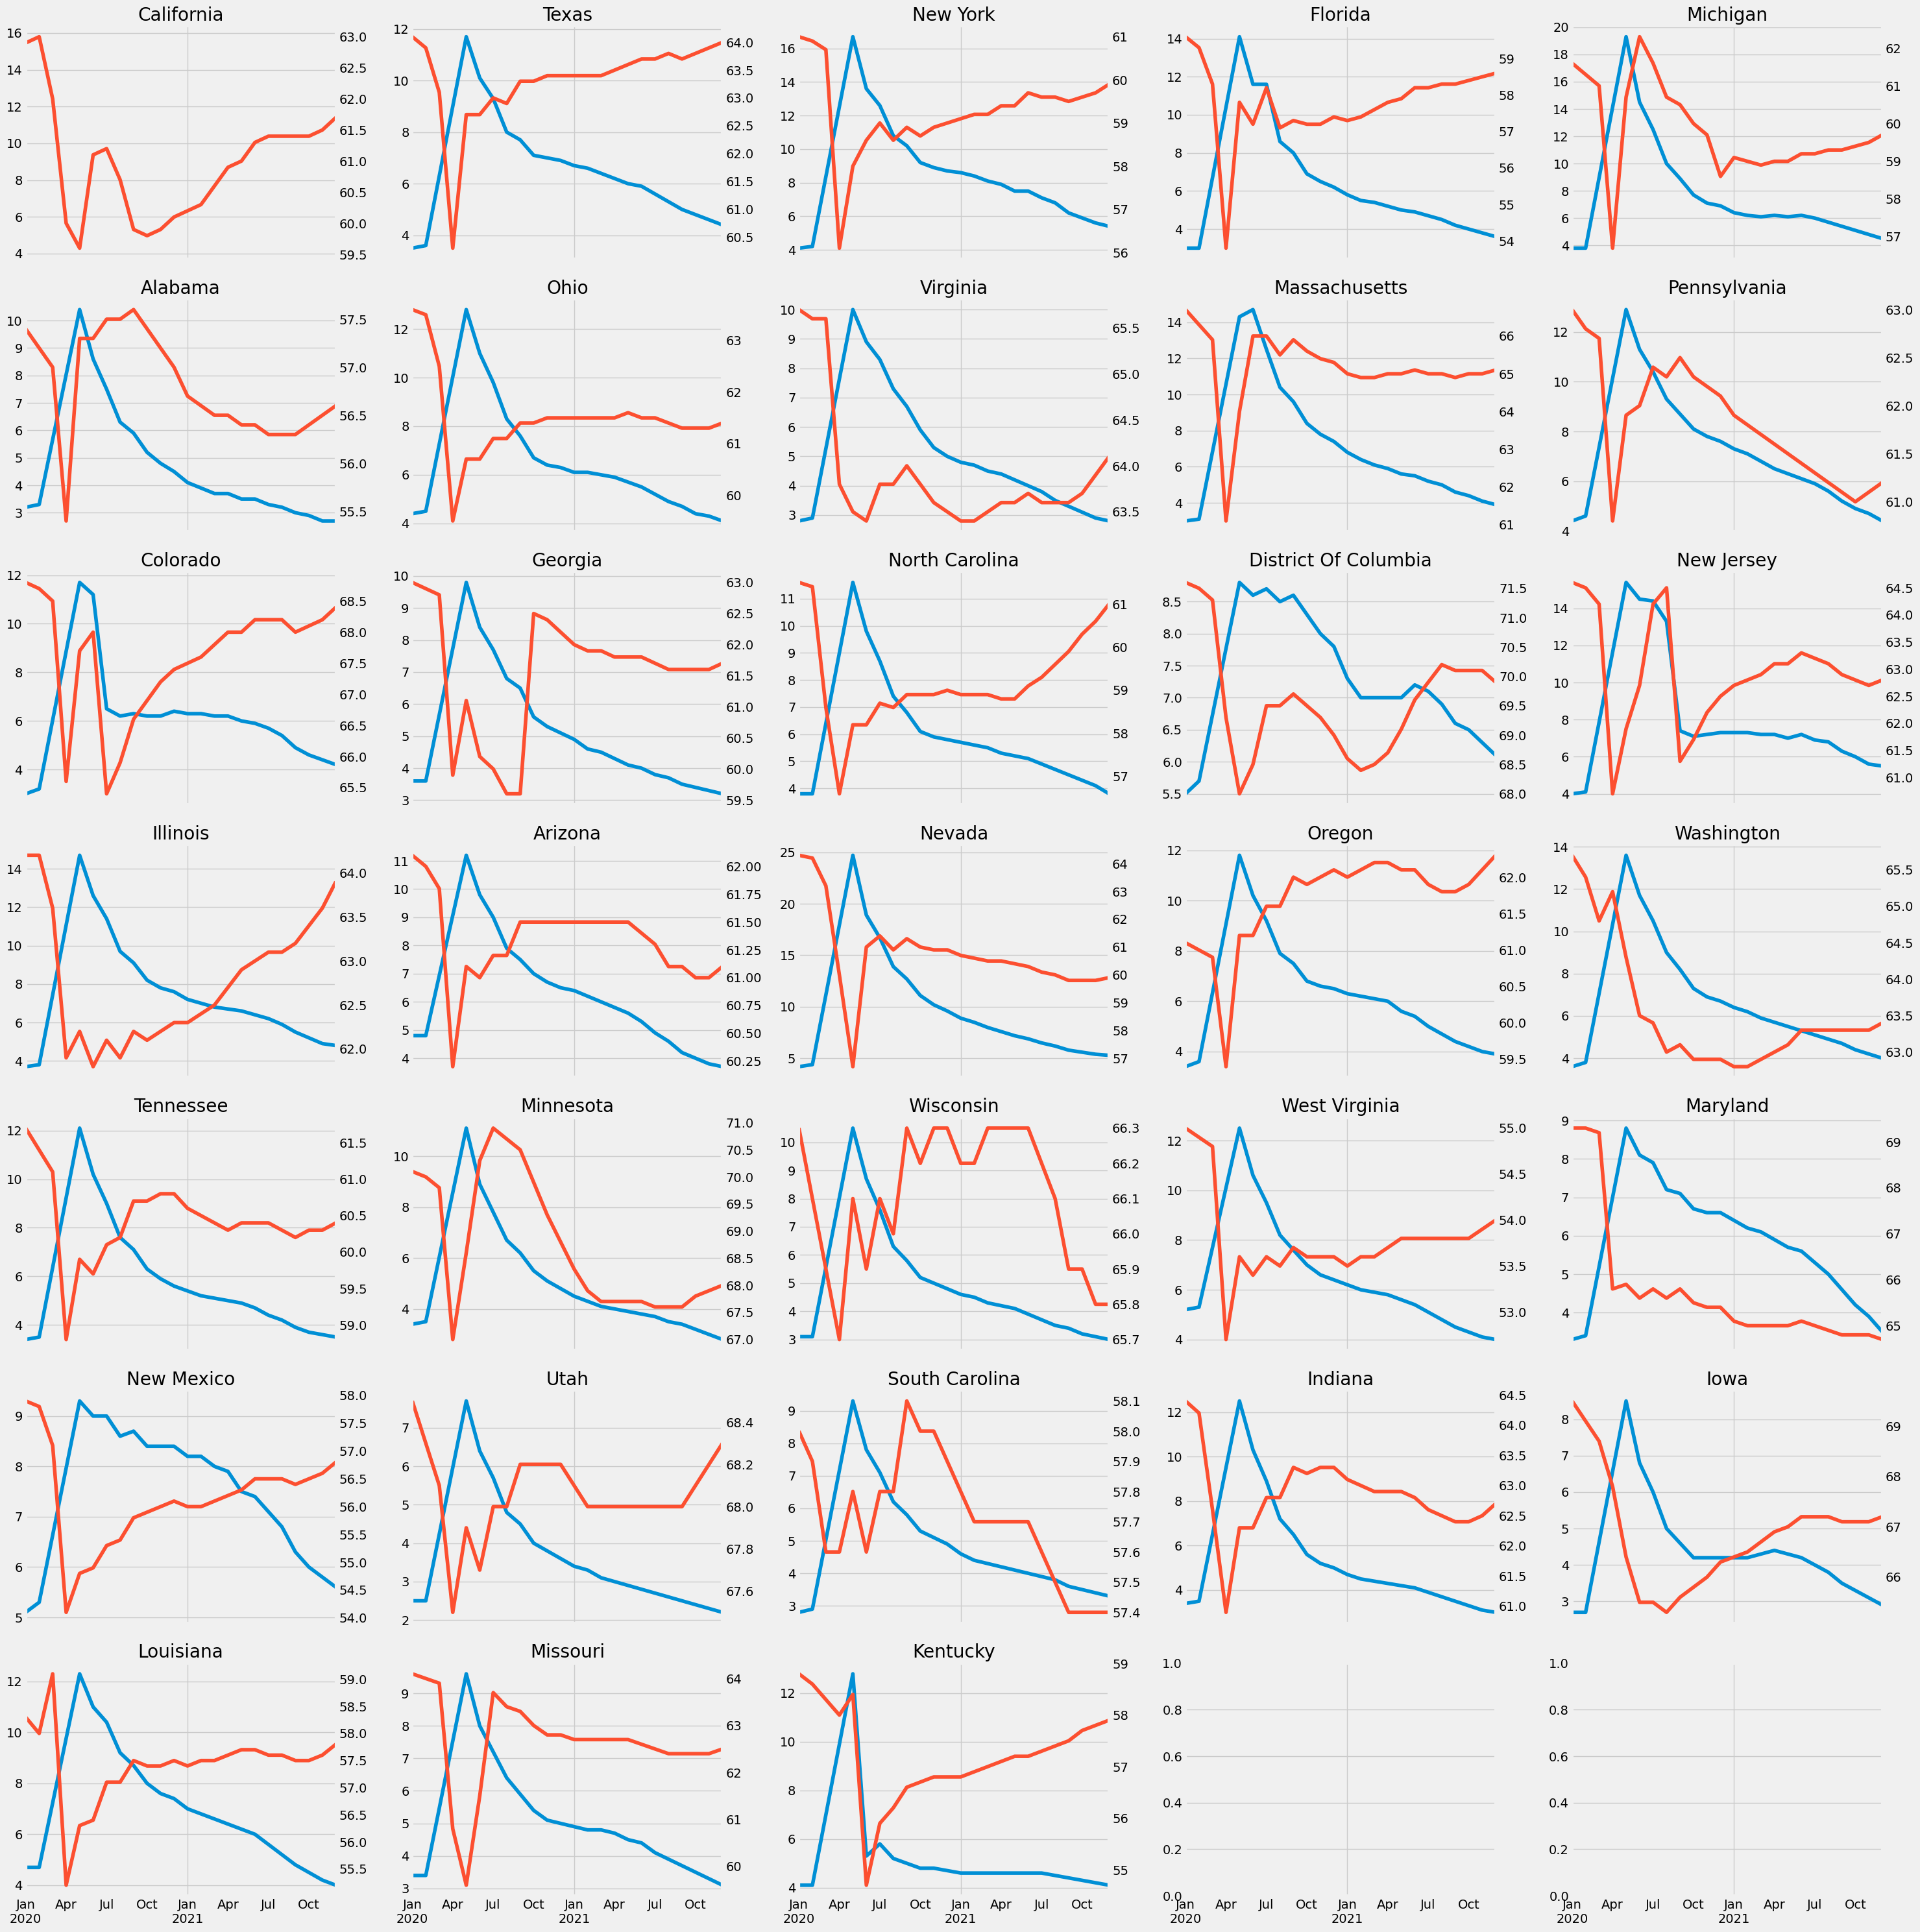

In [18]:
fig, axs = plt.subplots(7, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in "Puerto Rico":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()